Visualize the precipitation events next to each other

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from matplotlib.dates import DateFormatter

from load_wastewater_data import load_systems_data

# Update rcParams to set the default font to Times New Roman
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'DejaVu Serif'

In [2]:
# define experiment to be preprocessed
experiment_series = "2024_04_03"

In [3]:
plot_path = f"../plots/wastewater_model/"
os.makedirs(os.path.join(plot_path), exist_ok=True)

# Overview of Rain Settings

In [4]:
# load data
df_gentle = pd.read_csv(os.path.join("../..", "parameters_and_models", "wastewater_model", "nieselregen.txt"), sep="\t")
df_moderate = pd.read_csv(os.path.join("../..", "parameters_and_models", "wastewater_model", "mittelstarker_regen.txt"), sep="\t")

df_gentle["rain_scenario"] = "Nieselregen"
df_moderate["rain_scenario"] = "MittelstarkerRegen"
df = pd.concat([df_gentle, df_moderate])


df.columns = ["time", "l/s*ha", "rain_scenario"]
df.time = df.time / 60 / 24 # minutes -> days

### Plot moderate precipiation events next to each other

/tmp/ipykernel_225275/1869132141.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels([" ", "0", "2", "4", "6", "8", "10", "12", "14"])
/tmp/ipykernel_225275/1869132141.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels([" ", "0", "2", "4", "6", "8", "10", "12", "14"])


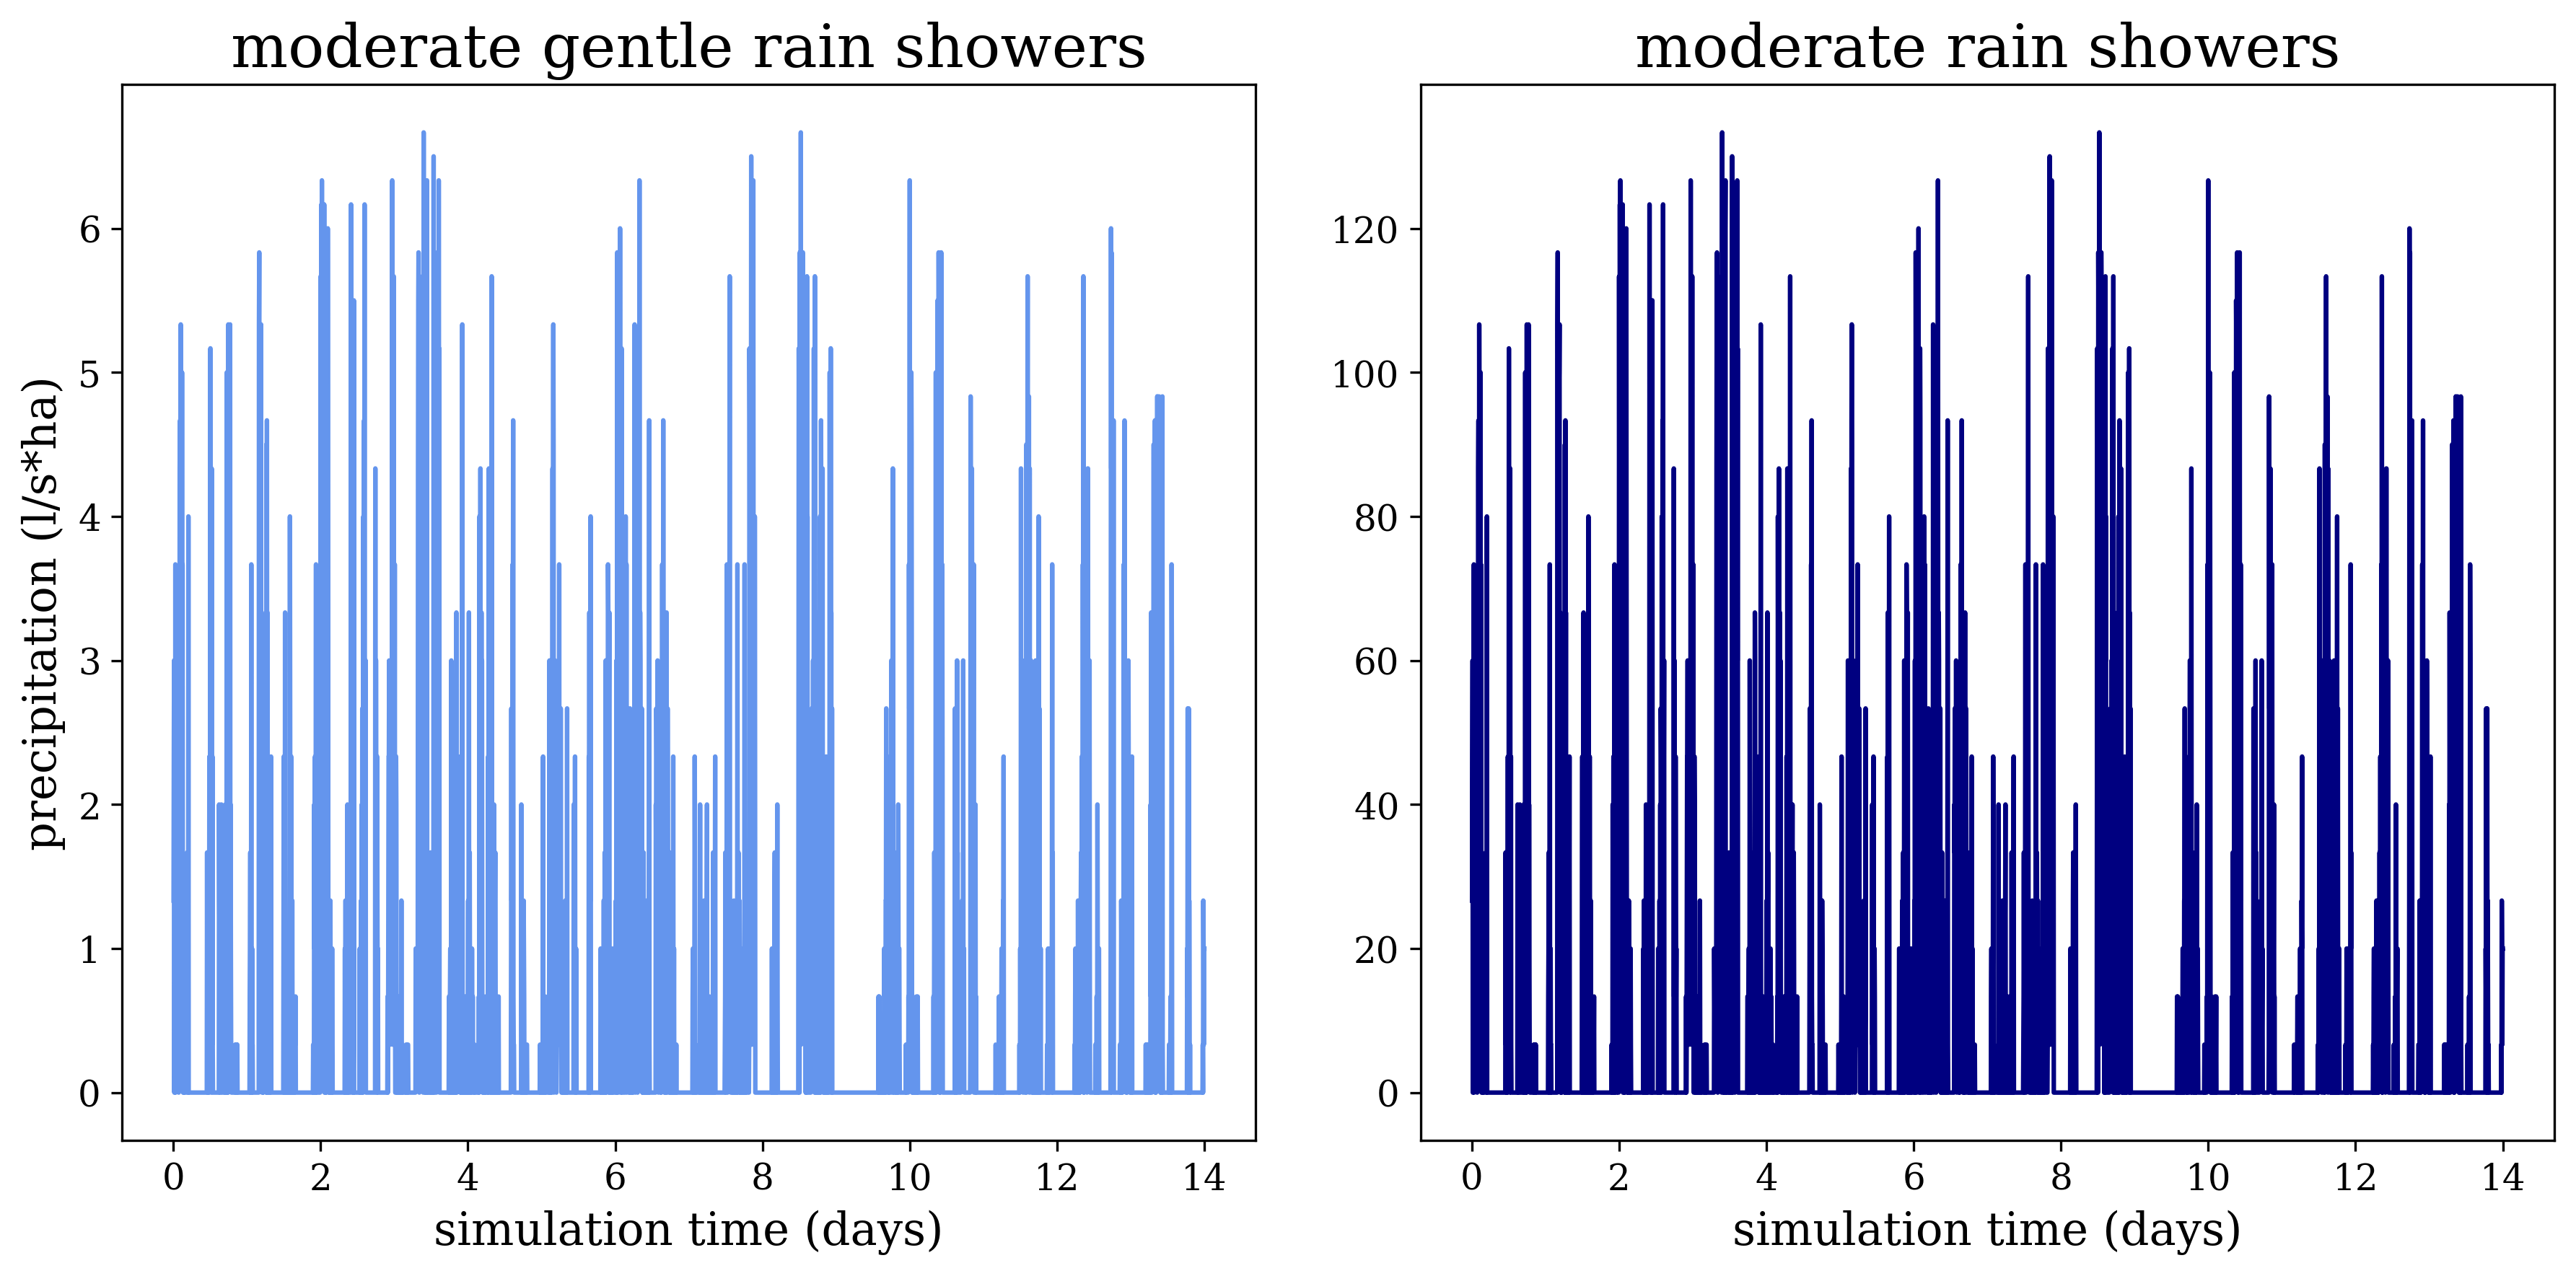

In [6]:
date_form = DateFormatter("%-d")

fig, axs = plt.subplots(ncols=2, sharey=False, figsize=(12, 6), dpi=300)
for i, (variate, variate_title) in enumerate(zip(["Nieselregen", "MittelstarkerRegen"], ["moderate gentle rain showers", "moderate rain showers"])):
    sns.lineplot(data=df.loc[df.rain_scenario==variate,:], x="time", y="l/s*ha", ax=axs[i], color=["cornflowerblue", "navy"][i])
    axs[i].set_title(f"{variate_title}", fontsize=20)    
    axs[i].xaxis.set_major_formatter(date_form) 
    axs[i].set_xlabel(f"simulation time [days]", fontsize=15)
    if i==0:
        axs[i].set_ylabel(f"precipitation [l/s⋅ha]", fontsize=15)
    else:
        axs[i].set_ylabel(" ")
    axs[i].set_xticklabels([" ", "0", "2", "4", "6", "8", "10", "12", "14"])
    axs[i].tick_params(axis='x', labelsize=12)
    axs[i].tick_params(axis='y', labelsize=12)

plt.tight_layout()
fig.savefig(os.path.join(plot_path, "rain_scenarios", f"precipitation_overview.png"))

/tmp/ipykernel_225275/3276255026.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels([" ", "0", "2", "4", "6", "8", "10", "12", "14"])
/tmp/ipykernel_225275/3276255026.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels([" ", "0", "2", "4", "6", "8", "10", "12", "14"])


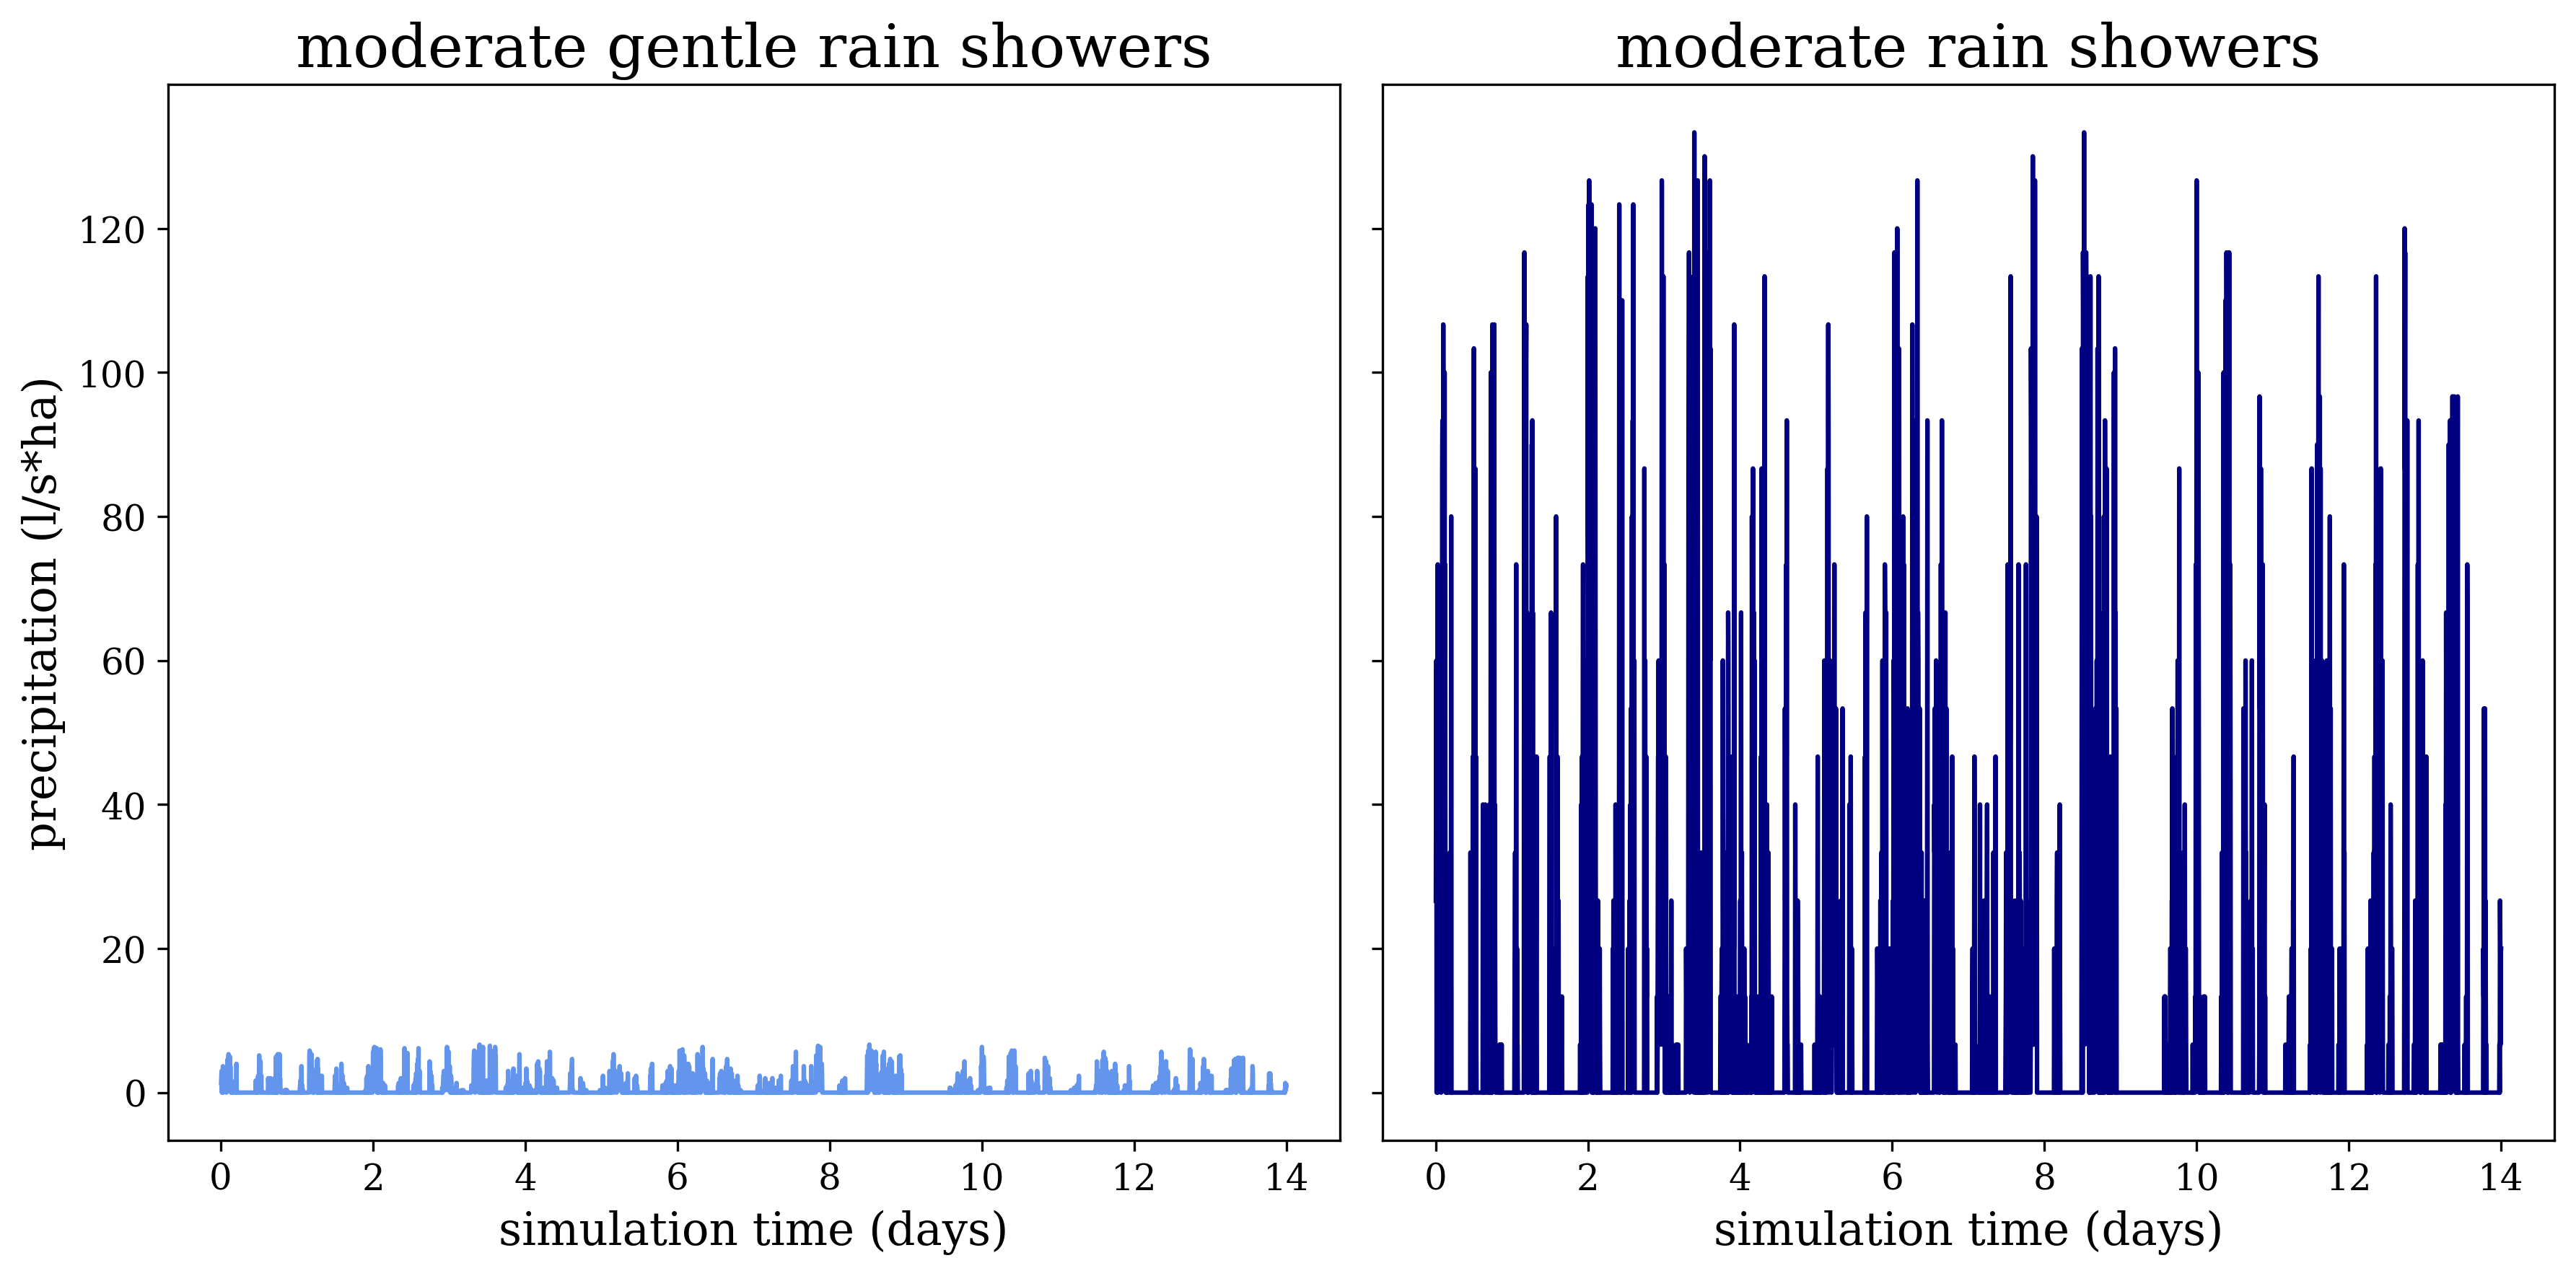

In [7]:
date_form = DateFormatter("%-d")

fig, axs = plt.subplots(ncols=2, sharey=True, figsize=(12, 6), dpi=300)
for i, (variate, variate_title) in enumerate(zip(["Nieselregen", "MittelstarkerRegen"], ["moderate gentle rain showers", "moderate rain showers"])):
    sns.lineplot(data=df.loc[df.rain_scenario==variate,:], x="time", y="l/s*ha", ax=axs[i], color=["cornflowerblue", "navy"][i])
    axs[i].set_title(f"{variate_title}", fontsize=20)    
    axs[i].xaxis.set_major_formatter(date_form) 
    axs[i].set_xlabel(f"simulation time [days]", fontsize=15)
    if i==0:
        axs[i].set_ylabel(f"precipitation [l/s⋅ha]", fontsize=15)
    else:
        axs[i].set_ylabel(" ")
    axs[i].set_xticklabels([" ", "0", "2", "4", "6", "8", "10", "12", "14"])
    axs[i].tick_params(axis='x', labelsize=12)
    axs[i].tick_params(axis='y', labelsize=12)

plt.tight_layout()
fig.savefig(os.path.join(plot_path, "rain_scenarios", f"precipitation_overview_share_y.png"))

### Experiment with second form of visualization

In [13]:
df["hours"] = df.time * 24

aggregated_hours = 2

bins = pd.interval_range(start=0, end=336, freq=aggregated_hours)

# Use pd.cut to assign each value to a bin
df['bin'] = pd.cut(df['hours'], bins)

# Group by the bins and sum the values
aggregated_df = df.groupby('bin')['l/s*ha'].sum().reset_index()

aggregated_df[f"days"] = np.linspace(0, 14, len(bins))

/tmp/ipykernel_196165/2443271289.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_df = df.groupby('bin')['l/s*ha'].sum().reset_index()


In [14]:
aggregated_df.head()

,bin,l/s*ha,days
0,"(0, 2]",686.007,0.000000
1,"(2, 4]",948.472,0.083832
2,"(4, 6]",181.986,0.167665
3,"(6, 8]",0.000,0.251497
4,"(8, 10]",0.000,0.335329


Text(0.5, 1.0, 'Histogram of Precipitation over Time')

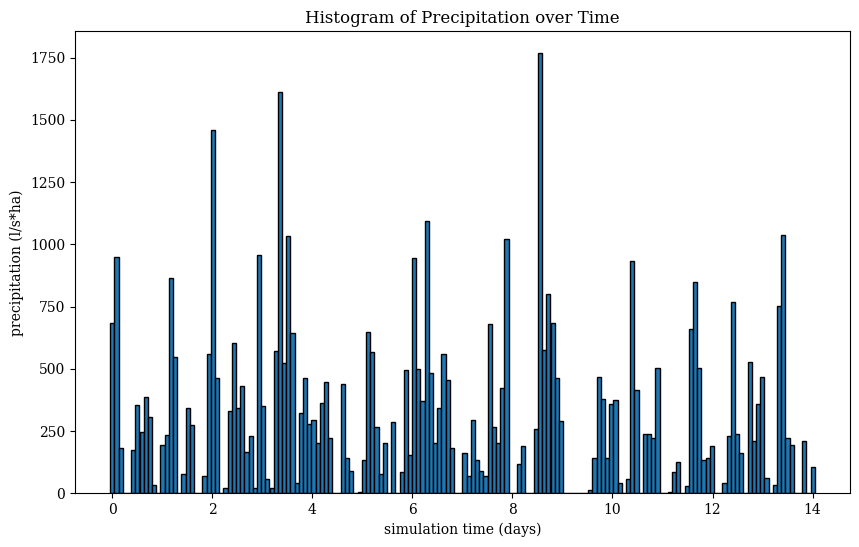

In [15]:
plt.figure(figsize=(10, 6))
plt.bar(aggregated_df[f'days'], aggregated_df['l/s*ha'], width=1/24*aggregated_hours, edgecolor='black')

# Add labels and title
plt.xlabel('simulation time (days)')
plt.ylabel('precipitation (l/s*ha)')
plt.title('Histogram of Precipitation over Time')